### Simulate a Basic Hebbian Neural Network
_The purpose of this example is to illustrate how to simulate a Hebbian Network and view its temporal changes_



In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pyBrainNetSim.models.world as world
import pyBrainNetSim.simulation.simnetwork as sim
import pyBrainNetSim.generators.random as rnd
import pyBrainNetSim.drawing.viewers as vis
mpl.rcParams['figure.figsize'] = (15, 6)

First generate a random Hebbian Network.

In [2]:
sm_prop_dist = rnd.SensorMoverPropertyDistribution()  # default set of distributions of the different variables in the network
my_network = sim.HebbianNetworkBasic(sm_prop_dist.create_digraph(), pos_synapse_growth=0.1, neg_synapse_growth=-0.05)

``my_network`` is the object used to simulate the network. Within this object holds the hebbain rules to change the synaptic weights.

The matrix notation of this type of linear learning is:

$$dW = \epsilon_{+} * (nodes_{firing} * nodes_{firing}.T)\cdot (Synapes>0) + \epsilon_{-} * (nodes_{not firing} * nodes_{not firing}.T)\cdot (Synapes>0)$$

where, in this simulation:
$$\epsilon^{+}=0.1$$
$$\epsilon^{-}=-0.05$$

Next, simulate ``my_network`` for a (maximum) of number of iterations and plot the resultant networks

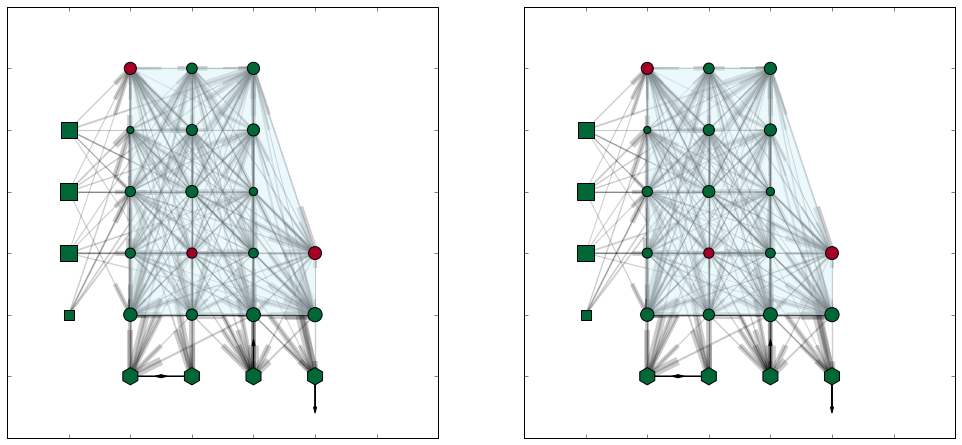

In [3]:
my_network.simulate(max_iter=1)
axs = my_network.draw_networkx()

The plots above show the network at two times. The neurons within the shaded region represen the internal neurons (brain). The squares represent the sensory neurons and the hexagons represent the motor neurons with the arrows pointing in the direction of movement.

Create a population of sensor-movers. Simulate them in time a number of steps. Then view the top sensor-movers, as measured by the total efficiency.

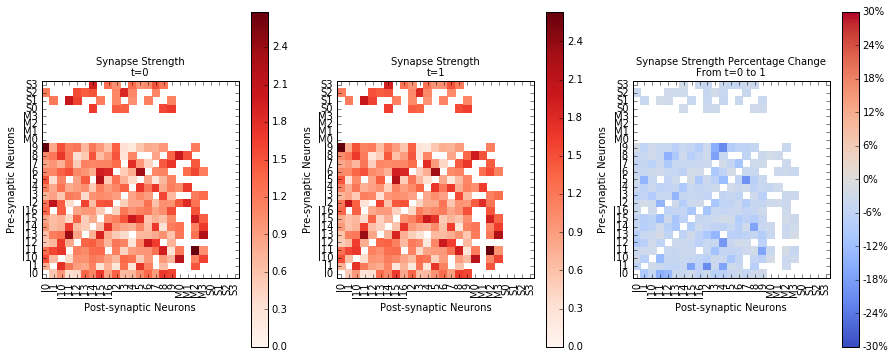

In [4]:
f, axarr = plt.subplots(1,3)
_ax = vis.pcolormesh_edges(my_network, at_time=0, ax=axarr[0])
_ax = vis.pcolormesh_edges(my_network, at_time=-1, ax=axarr[1])
_ax = vis.pcolormesh_edge_changes(my_network, initial_time=0, final_time=-1, as_pct=True, ax=axarr[2])

Above is a heat-map of the synaptic strength as they change from the initial time period to the final time period.

_How to read this chart_
- **Left two plots** Each square represents the strength of the synapse from the pre-synaptic (row) row onto the post-synaptic (colum) neuron. 
- **Right plot** - Shows the percentage change in these synaptic strengths, via Hebbian Learning, from the initial network to the latest time period.